# Pytorch dataloaders for echocardiography

Miguel Xochicale [@mxochicale](https://github.com/mxochicale)  
Dec 2021


## Introduction
This notebook presents prototypes to pre-process echocardiography datasets with the use of pytorch features. 

## Running notebook

1. Go to echocardiography repository path: `$HOME/repositories/echocardiography/`
2. Open echocardiography repo in pycharm and in the terminal type:
    ```
    git checkout master # or the branch
    git pull # to bring a local branch up-to-date with its remote version
    ```
3. Launch Notebook server
    Go to you repository path: `cd $HOME/repositories/echocardiography/scripts/dataloaders` and type in the pycharm terminal:
    ```
    conda activate rt-ai-echo-VE 
    jupyter notebook
    ```
    which will open your web-browser.
    
    
## References
* NVIDIA Data Loading Library (DALI): https://github.com/NVIDIA/DALI/tree/main/docs/examples/sequence_processing Added: Mon 13 Dec 09:22:05 GMT 2021



## Jupyter Notebook

### Setting imports and datasets paths

In [1]:
import os
import sys
import argparse
import yaml
import torch
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from torch.utils.data import DataLoader
from source.dataloaders.EchocardiographicVideoDataset import ViewVideoDataset

HOME_PATH = os.path.expanduser(f'~')
CONFIG_FILES_PATH= 'repositories/echocardiography/scripts/config_files'
YML_FILE = os.path.join(HOME_PATH, CONFIG_FILES_PATH, 'config_4cv.yml')

with open(YML_FILE, 'r') as yml:
    config = yaml.load(yml, Loader=yaml.FullLoader)

### Setting datasets using pytorch dataloader

In [4]:
dataset = ViewVideoDataset(config['participant_videos_path'], config['participant_path_json_files'])

video_index_S0 = 0
data_S0 = dataset[video_index_S0]

video_index_S1 = 1
data_S1 = dataset[video_index_S1]

video_index_S2 = 2
data_S2 = dataset[video_index_S2]


  
  
  video_name=/home/mx19/datasets/vital-us/echocardiography/videos-echo/01NVb-003-072/T1/01NVb-003-072-1-echo.mp4
  Frame_height=1080, frame_width=1920 fps=30 nframes=23285 
  jsonfile_name=/home/mx19/repositories/echocardiography/data/labelling/json_files/4CV/01NVb_003_072/01NVb_003_072_T1_4CV.json
  number_of_labelled_clips=1
  
  


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23285/23285 [00:55<00:00, 422.51it/s]


Function '__getitem__' executed in 55.3013s
  
  
  video_name=/home/mx19/datasets/vital-us/echocardiography/videos-echo/01NVb-003-072/T2/01NVb-003-072-2-echo-cont.mp4
  Frame_height=1080, frame_width=1920 fps=30 nframes=20130 
  jsonfile_name=/home/mx19/repositories/echocardiography/data/labelling/json_files/4CV/01NVb_003_072/01NVb_003_072_T2_4CV.json
  number_of_labelled_clips=3
  
  


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20130/20130 [00:48<00:00, 418.87it/s]


Function '__getitem__' executed in 48.4058s
  
  
  video_name=/home/mx19/datasets/vital-us/echocardiography/videos-echo/01NVb-003-072/T3/01NVb-003-072-3-echo.mp4
  Frame_height=1080, frame_width=1920 fps=30 nframes=23225 
  jsonfile_name=/home/mx19/repositories/echocardiography/data/labelling/json_files/4CV/01NVb_003_072/01NVb_003_072_T3_4CV.json
  number_of_labelled_clips=2
  
  


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23225/23225 [00:54<00:00, 427.25it/s]


Function '__getitem__' executed in 54.5873s


### Using dataloader with pre-processing image techniques

 <class 'torch.Tensor'>, torch.Size([180, 3, 1080, 1920]) 
 <class 'torch.Tensor'>, torch.Size([359, 3, 1080, 1920]) 
 <class 'torch.Tensor'>, torch.Size([150, 3, 1080, 1920]) 
 180 


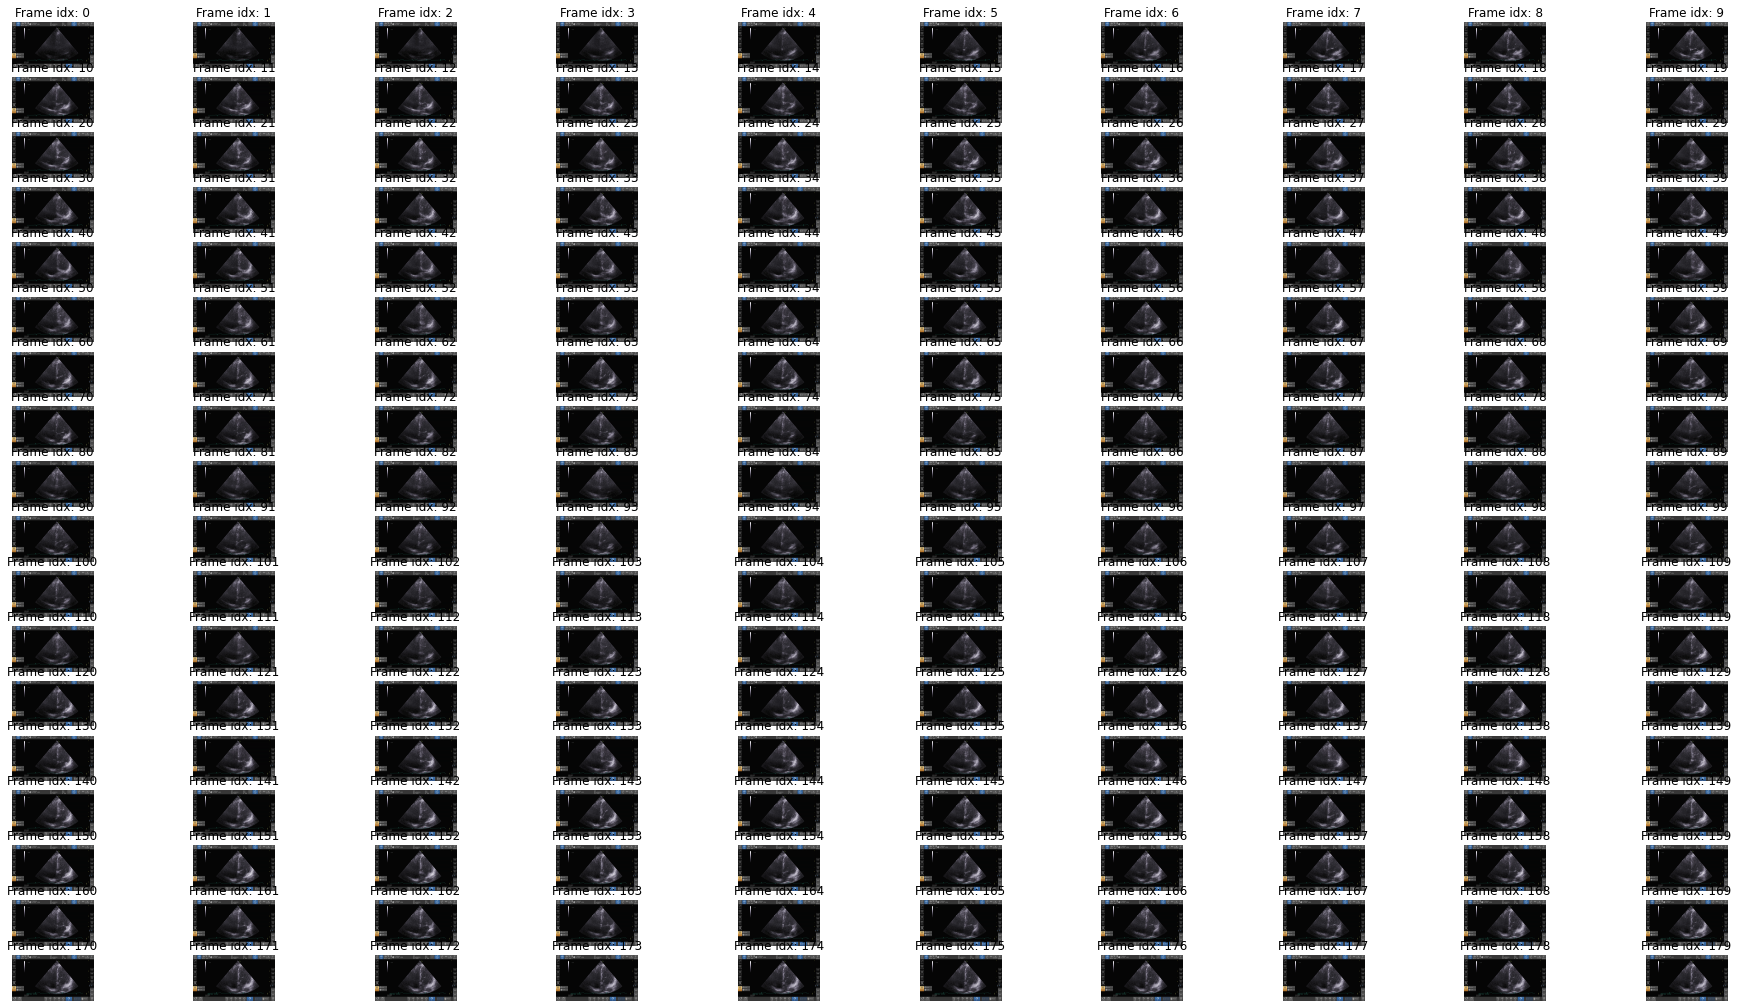

In [7]:
print(f' {type(data_S0)}, {data_S0.size()} ')
print(f' {type(data_S1)}, {data_S1.size()} ')
print(f' {type(data_S2)}, {data_S2.size()} ')


dataloader = DataLoader(data_S0,
                    batch_size=1,
                    shuffle=False,
                    num_workers=0,
                    pin_memory=True
                    )
length_of_dl=len(dataloader)
print(f' {length_of_dl} ')

columns = 10
rows = (length_of_dl + 1) // (columns)
fig = plt.figure(figsize = (32, (16 // columns) * rows))
gs = gridspec.GridSpec(rows, columns)

for (idx, batch) in enumerate(dataloader):
#     print(f' Index: {idx}')
#     print(f' Batch: {batch}')
#     print(f' {type(batch)}, {batch.size()} ')
#     print(f' {batch.permute(2,3,1,0).size()} ')
    imgs = batch.permute(2,3,1,0)
    imgs_flatten = torch.flatten(imgs,2)
    # print(f'{imgs_flatten.size()}')
    plt.subplot(gs[idx])
    plt.axis("off")
    plt.title('Frame idx: {}'.format(idx)) 
    plt.imshow(imgs_flatten)

    
plt.show()
    
    
    
